In [1]:
library(bnlearn)
library(parallel)

data_numeric = read.table("../data/prediction.train.numeric.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=F)
blacklist = read.table("../data/blacklist.txt", header=T, sep="\t", row.names=1)

In [2]:
data_binary = read.table("../data/prediction.train.binary.txt", header = TRUE, sep="\t", row.names=1, check.names=F, stringsAsFactors=T)

In [3]:
data_numeric <- as.data.frame(lapply(data_numeric, as.numeric))

In [ ]:
# data = dedup(data_numeric, threshold=.95)

In [4]:
# cnames = sample(colnames(data_numeric), 160)
cnames = colnames(data_numeric)

In [ ]:
# dim(data)

In [5]:
data_small <- data_numeric[,cnames]

In [6]:
data = cbind(dedup(data_small, threshold=.95), data_binary)

In [7]:
blacklist_small <- blacklist[blacklist$from %in% colnames(data),]
blacklist_small <- blacklist_small[blacklist_small$to %in% colnames(data),]

In [8]:
print(dim(blacklist_small))

[1] 37601     2


In [9]:
# blacklist_small

In [10]:
# data_small

In [11]:
# data_small = dedup(data_small, threshold=.95)

In [12]:
# data

Time difference of 19.14727 mins


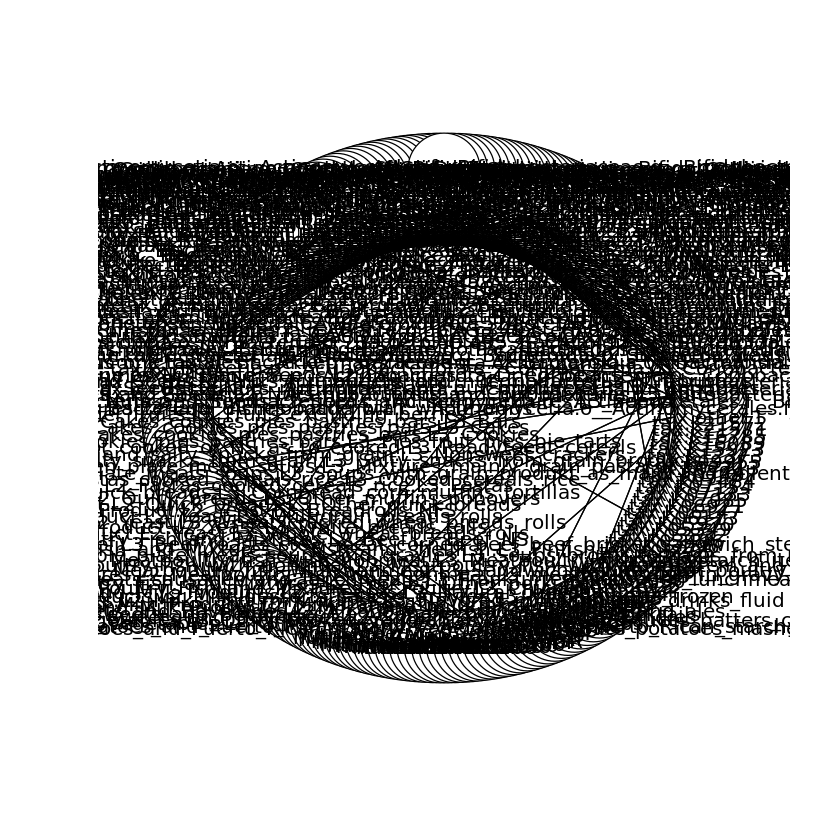

In [13]:
learn.dag <- function() {
    cl = makeCluster(40, type = "SOCK")
    # dag = si.hiton.pc(data_small, cluster = cl, blacklist = blacklist_small, alpha = 0.05, test="mi-cg")
#     dag = si.hiton.pc(data_small, cluster = cl, blacklist = blacklist_small, alpha=0.05, undirected=T, test="cor")
    dag = si.hiton.pc(data, cluster = cl, blacklist = blacklist_small, alpha=0.05, undirected=T)
    # dag = si.hiton.pc(data_small, blacklist = blacklist_small, alpha = 0.05)
    on.exit(stopCluster(cl))
    return(dag)
}


start_time <- Sys.time()
dag <- learn.dag()
end_time <- Sys.time()
amat.data = amat(dag)
plot(dag)
write.table(amat.data, "../results/dag.prediction.train.csv", sep="\t")
print(end_time - start_time)

In [14]:
dag


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 227 
  arcs:                                  179 
    undirected arcs:                     179 
    directed arcs:                       0 
  average markov blanket size:           1.58 
  average neighbourhood size:            1.58 
  average branching factor:              0.00 

  learning algorithm:                    Semi-Interleaved HITON-PC 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  10702409 


In [ ]:
dag$nodes

In [ ]:
# blacklist